# D7 Recreating  W E B Du Bois Visualisation
---
### Thirty days of Data Visualisations
JWriggy

Inspired by a [challenge](https://github.com/ajstarks/dubois-data-portraits/tree/master/challenge) to recreate some of Du Bois's classic visualisations.

Comparing numbers on different scales - a spiral bar chart.

I scratched my head a bit on this one thinking how to calculate the lengths of the spirals based on the data ... until I twigged that I could just do it numerically - summing the distances between points used to outline the shape.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

plt.style.use('db.mplstyle')

In [2]:
# The Data
df = pd.read_csv('data/Dubois7.csv')
df

,Year,Houshold Value (Dollars)
0,1875,21186
1,1880,498532
2,1885,736170
3,1890,1173624
4,1895,1322694
5,1899,1434975


In [3]:
# scale data 0 - 100
zz = df['Houshold Value (Dollars)']*100/max(df['Houshold Value (Dollars)'])
zz

0      1.476402
1     34.741511
2     51.301939
3     81.787069
4     92.175404
5    100.000000
Name: Houshold Value (Dollars), dtype: float64

In [4]:
# text
title = 'ASSESSED VALUE OF HOUSEHOLD AND KITCHEN FURNITURE\nOWNED BY GEORGIA NEGROES'

# style
colors = ['#ffc0cb','#4682b4','#d2b48c','#ffd700','#eeeeee','#dc143c'] 
ec = '#666666'
h2 = {'fontsize': 10, 'alpha': 0.6,  'ha':'right', 'va':'top'}

# some parameters to tweak to adjust the look, scale etc
dt = .5 # thickness of spiral bar        
R = 13.5 # max radius of outermost spiral
h = 6*dt # change in r over 1 revolution
numpts = 500 # number of points to create one full spiral
maxrev = 3 # maximum number of revolutions to use

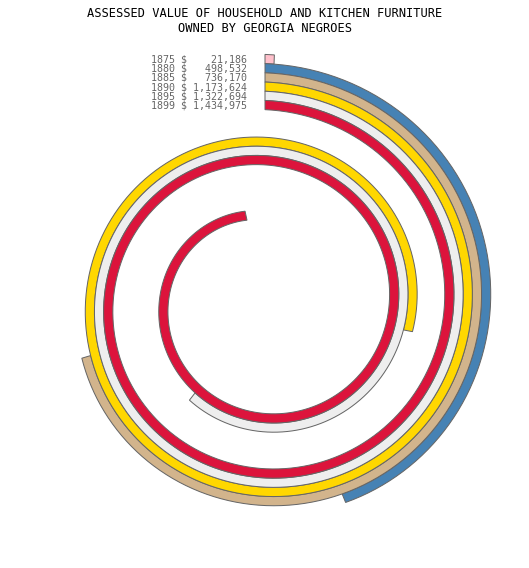

In [8]:
fig,ax = plt.subplots(figsize=(8,8))
ax.set_frame_on(False)
ax.tick_params(labelleft=False,labelbottom=False )

# spirals centred on 0,0
ax.set_xlim(-R-.5, R+.5)
ax.set_ylim(-R-.5, R+.5)
ax.axes.set_aspect('equal')

# NB the exact calculation of spiral length is a bit complex 
# Here length is approximated by summing distances between points
# first set up r, theta polar coordinates of a spiral of a max number of revolutions
theta = np.linspace(np.pi/2, np.pi/2 - maxrev*2*np.pi, numpts) # clockwise from outer edge, maxrev revolutions
for i, L in enumerate(zz): # for each datapoint
    r1 = R-i*dt  # radius at outermost point
    r2 = r1 - maxrev*h # spiral radius after maxrev revolutions 
    ro = np.linspace(r1,r2,numpts) # outer spiral polygon coords
    ri = np.linspace(r1-dt,r2-dt,numpts) # inner spiral polygon coords
    # cartesian coords
    xos, yos = ro*np.cos(theta), ro*np.sin(theta) 
    xis, yis = ri*np.cos(theta), ri*np.sin(theta) 
    # find number of points needed to create spiral of approx same length as scaled data
    dls = np.sqrt(np.diff(xos)**2 + np.diff(yos)**2) # distance between points
    spiralLength = 0
    for npts,dl in enumerate(dls) :
        spiralLength += dl
        if spiralLength > L :
            # plot the polygon        
            verts = list(zip(np.concatenate([np.flip(xis[:npts]), xos[:npts]]), np.concatenate([np.flip(yis[:npts]), yos[:npts]])))
            ax.add_patch(Polygon(verts, facecolor=colors[i], edgecolor=ec))
            break
    if npts==0:
        print("Rescale to fit")
    
    # annotate
    txt = (str(df.at[i,'Year']) + ' $ {:9,}').format(df.at[i,'Houshold Value (Dollars)'])
    ax.text(xos[0]-1, yos[0],txt , fontdict=h2 )

fig.suptitle(title, fontsize=12, ha='center')
plt.tight_layout()
plt.savefig("vis/D7_duBois7.png")
plt.show()